In [1]:
import numpy
from scipy.linalg import solve

In [10]:
def constructMatrix(nx, ny, sigma):
    A = numpy.zeros(((nx-2)*(ny-2),(nx-2)*(ny-2)))
    
    row_number = 0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            if i==1 and j==1:
                A[row_number,row_number] = 1/sigma+4
                A[row_number,row_number+1] = -1
                A[row_number,row_number+nx-2] = -1
            elif i==nx-2 and j==1:
                A[row_number,row_number]=1/sigma+3
                A[row_number,row_number-1]=-1
                A[row_number,row_number+nx-2]=-1
            elif i==1 and j==ny-2:
                A[row_number, row_number]=1/sigma+3
                A[row_number, row_number+1]=-1
                A[row_number,row_number-(nx-2)]=-1
            elif i==nx-2 and j==ny-2:
                A[row_number,row_number]=1/sigma+2
                A[row_number,row_number-1]=-1
                A[row_number,row_number-(nx-2)]=-1
            elif i==1:
                A[row_number,row_number]=1/sigma+4
                A[row_number,row_number+1]=-1
                A[row_number,row_number+nx-2]=-1
                A[row_number,row_number-(nx-2)]=-1
            elif i==nx-2:
                A[row_number,row_number]=1/sigma+3
                A[row_number,row_number-1]=-1
                A[row_number,row_number+(nx-2)]=-1
                A[row_number,row_number-(nx-2)]=-1
            elif j==1:
                A[row_number,row_number]=1/sigma+4
                A[row_number,row_number+1]=-1
                A[row_number,row_number-1]=-1
                A[row_number,row_number+nx-2]=-1
            elif j==ny-2:
                A[row_number,row_number]=1/sigma+3
                A[row_number,row_number+1]=-1
                A[row_number,row_number-1]=-1
                A[row_number,row_number-(nx-2)]=-1
            else:
                A[row_number,row_number]=1/sigma+4
                A[row_number,row_number+1]=-1
                A[row_number,row_number-1]=-1
                A[row_number,row_number+nx-2]=-1
                A[row_number,row_number-(nx-2)]=-1
            row_number += 1
    return A

In [37]:
def generateRHS(nx,ny,sigma,T,T_bc):
    RHS = numpy.zeros((nx-2)*(ny-2))
    row_number = 0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            if i==1 and j==1:
                RHS[row_number]=T[j,i]*1/sigma+2*T_bc
            
            elif i==nx-2 and j==1:
                RHS[row_number]=T[j,i]*1/sigma+T_bc
            
            elif i==1 and j==ny-2:
                RHS[row_number]=T[j,i]*1/sigma+T_bc
            
            elif i==nx-2 and j==ny-2:
                RHS[row_number]=T[j,i]*1/sigma
                
            elif i==1:
                RHS[row_number]=T[j,i]*1/sigma+T_bc
            
            elif i==nx-2:
                RHS[row_number]=T[j,i]*1/sigma
            
            elif j==1:
                RHS[row_number]=T[j,i]*1/sigma+T_bc
            
            elif j==ny-2:
                RHS[row_number]=T[j,i]*1/sigma
                
            else:
                RHS[row_number]=T[j,i]*1/sigma
            
            row_number += 1
    return RHS

In [38]:
def map_1Dto2D(nx,ny,T_1D,T_bc):
    T=numpy.zeros((ny,nx))
    
    row_number = 0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            T[j,i]=T_1D[row_number]
            row_number += 1
    T[0,:]=T_bc
    T[:,0]=T_bc
    T[-1,:]=T[-2,:]
    T[:,-1]=T[:,-2]
    return T

In [39]:
def btcs_2D(T,A,nt,sigma,T_bc,nx,ny,dt):
    j_mid=(numpy.shape(T)[0])/2
    i_mid=(numpy.shape(T)[1])/2
    
    for t in range(nt):
        Tn=T.copy()
        b = generateRHS(nx,ny,sigma,Tn,T_bc)
        T_interior = solve(A,b)
        T = map_1Dto2D(nx,ny,T_interior,T_bc)
        
        if T[j_mid,i_mid] >= 70:
            print("center of plate reached 70C at time {0:.2f}s, in time step{1:d}.".format(dt*t,t))
            break
            
    if T[j_mid,i_mid]<=70:
        print("Center has not reached 70C yet, it is only {0:.2f}C.".format(T[j_mid,i_mid]))
    
    return T

In [46]:
alpha = 1e-4
L = 1.0e-2
H = 1.0e-2
nx = 21
ny = 21
nt = 300
dx = L/(nx-1)
dy = H/(ny-1)
x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)
T_bc = 100
Ti= numpy.ones((ny,nx))*20
Ti[0,:]=T_bc
Ti[:,0] = T_bc

In [47]:
sigma = 0.25
A = constructMatrix(nx,ny,sigma)

In [48]:
dt = sigma*min(dx,dy)**2/alpha
T = btcs_2D(Ti.copy(),A,nt,sigma,T_bc,nx,ny,dt)

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


center of plate reached 70C at time 0.16s, in time step256.


In [49]:
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

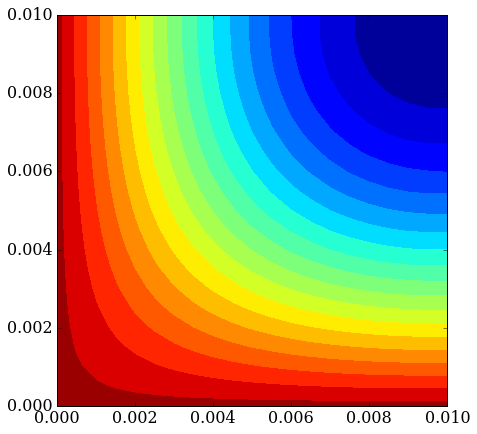

In [50]:
mx,my=numpy.meshgrid(x,y)
pyplot.figure(figsize=(7,7))
pyplot.contourf(my,mx,T,20);